# Isolation Forest (détection d'anomalies)

On effectue un nombre de **splits** (découpes) aléatoires, et on compte le nombre de splits nécessaires pour isoler les échantillons. Plus le nombre est faible, plus il y a de chance pour que cet échantillon soit une anomalie.

Pour éviter l'isolation d'un élément qui n'est pas anormal, on utilise plusieurs estimateurs, (**Technique d'Ensembles**). Isolation Forest est un ensemble de générateur de type arbres. Chaque split représente les branche des arbres de décisions.

## Imports

In [4]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

## Création du dataset


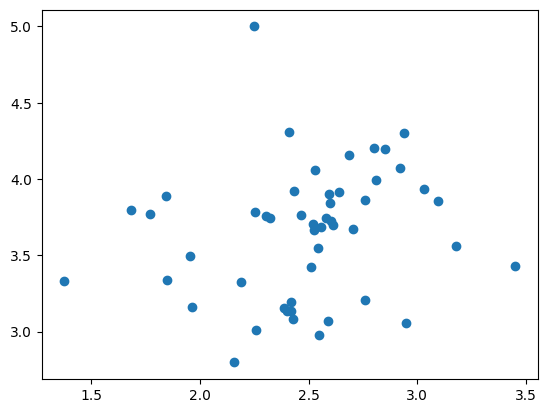

In [10]:
X, y = make_blobs(n_samples = 50, centers = 1, cluster_std = 0.4)
X[-1,:]=np.array([2.25,5])
plt.scatter(X[:,0], X[:,1])

## Utilisation d'Isolation Forest

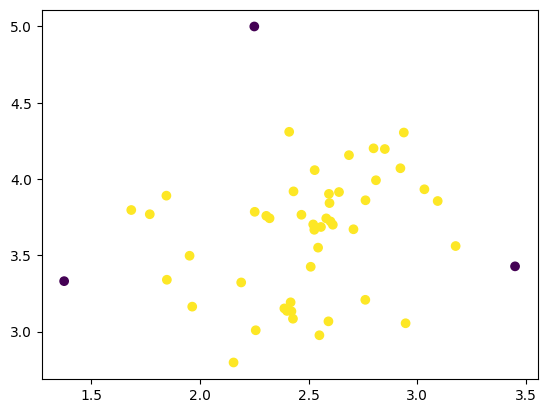

In [14]:
model = IsolationForest(contamination = 0.05) # Contaminiation représente le taux de données à filtrer
model.fit(X)
plt.scatter(X[:,0], X[:,1], c= model.predict(X))


In [16]:
for i,k in enumerate(model.predict(X)) :
    if k == -1 :
        print(i)


26
28
49


## Exemple sur le jeu de données digit


In [17]:
from sklearn.datasets import load_digits

In [18]:
digits = load_digits()
images = digits.images # Charge les images
X = digits.data
Y = digits.target

Taille du dataset :(1797, 64)
data : [ 0.  0. 12. 10.  0.  0.  0.  0.  0.  0. 14. 16. 16. 14.  0.  0.  0.  0.
 13. 16. 15. 10.  1.  0.  0.  0. 11. 16. 16.  7.  0.  0.  0.  0.  0.  4.
  7. 16.  7.  0.  0.  0.  0.  0.  4. 16.  9.  0.  0.  0.  5.  4. 12. 16.
  4.  0.  0.  0.  9. 16. 16. 10.  0.  0.]
target :5


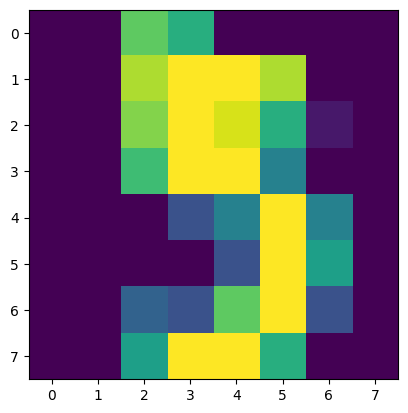

In [20]:
print(f"Taille du dataset :{X.shape}")
plt.imshow(images[5])
print(f"data : {X[5]}")
print(f"target :{Y[5]}")

In [38]:
model = IsolationForest(random_state=0, contamination = 0.01)
model.fit(X)

IsolationForest(contamination=0.01, random_state=0)

In [39]:
outliers = model.predict(X) == -1

18


Text(0.5, 1.0, '4')

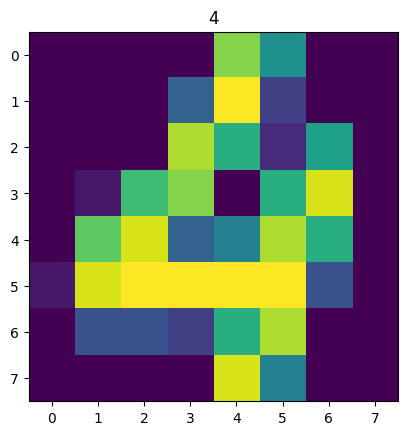

In [41]:
print(len(images[outliers]))
plt.imshow(images[outliers][17])
plt.title(Y[outliers][17])

Voir aussi les algorithmes suivants :

* Local Outlier Factor : repose sur KNN et permet de faire de la Novelty Detection => on entraine la machine pour trouver des anomalies non pas dans le train set, mais dans le test set.